<a href="https://colab.research.google.com/github/felipemontano10/DeepLearning/blob/master/PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ECE 685D - Fall 2020
## Problem Set 1 

> J. Felipe Montano-Campos

**Problem 1: Exponential Distribution**


In [1]:
import random 
import math 
import matplotlib.pyplot as plt 

In [2]:
def random_unif_array(lower_bound, upper_bound, size):
    return [random.uniform(lower_bound, upper_bound) for _ in range(size)] 

def exp_rv(lamb, x):
    f = (-1/lamb)*math.log(1-x)
    return f


In [3]:
x_domain = random_unif_array(0,1, 10**5)
x_domain_exp= {}
for lamb in [0.1,1,10]:
    x_domain_exp[lamb] = [exp_rv(lamb,x) for x in x_domain] 

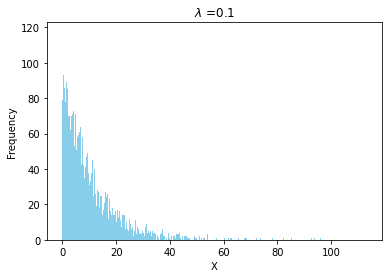

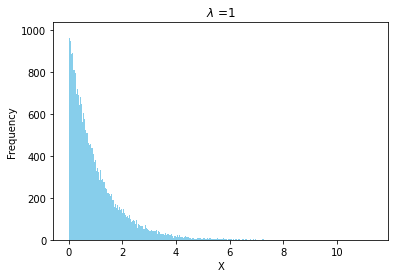

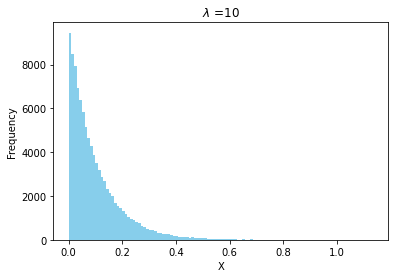

In [4]:
bin_width = 0.01
for lamb in [0.1, 1, 10]:
  n_bins = int(((math.ceil(max(x_domain_exp[lamb]) * 100) / 100) - (math.floor(min(x_domain_exp[lamb])*100)/100))/bin_width) +1
  plt.hist(x_domain_exp[lamb], bins = n_bins, color = "skyblue" )
  plt.xlabel("X")
  plt.ylabel("Frequency")
  plt.title(r"$\lambda$ ="+str(lamb)) 
  plt.show()

**Problem 2: Gamma Distibution**

In [5]:
def gam_rv(k,beta):
  j = 1
  x = {}
  while j < k+1:
    y_domain = random_unif_array(0,1, 10**5) 
    x[j] = [exp_rv(1/beta,y) for y in y_domain]
    j +=1
  sum_list = []
  for(x[1], x[2], x[3], x[4], x[5]) in zip(x[1], x[2], x[3], x[4], x[5]):
    sum_list.append(x[1]+ x[2]+ x[3]+ x[4]+ x[5])
  return sum_list



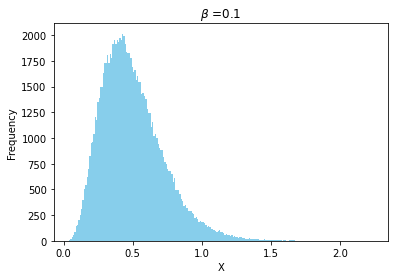

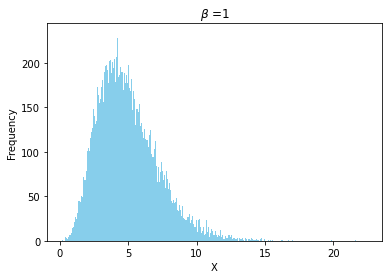

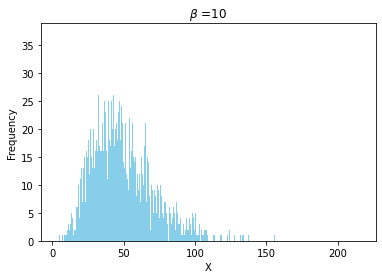

In [6]:
for beta in [0.1,1,10]:
    x = gam_rv(5,beta)
    n_bins = int(((math.ceil(max(x) * 100) / 100) - (math.floor(min(x)*100)/100))/bin_width) +1
    plt.hist(x, bins = n_bins, color = "skyblue" )
    plt.xlabel("X")
    plt.ylabel("Frequency")
    plt.title(r"$\beta$ ="+str(beta)) 
    plt.show() 

**Problem 3: Beta distribution**

In [7]:
def beta_rv(alpha_1, alpha_2, n_sample):
    k = alpha_1
    n = alpha_2+k-1
    res = [random_unif_array(0,1, n) for i in range(n_sample)] 
    final = []
    for i in res:
        a = i
        a.sort()
        final.append(a[k-1])
    return final 

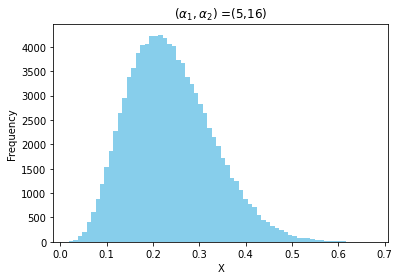

In [8]:
x = beta_rv(5, 16, 10**5)

n_bins = int(((math.ceil(max(x) * 100) / 100) - (math.floor(min(x)*100)/100))/bin_width) +1
plt.hist(x, bins = n_bins, color = "skyblue" )
plt.xlabel("X")
plt.ylabel("Frequency")
plt.title(r"$(\alpha_{1},\alpha_{2})$ =(5,16)") 
plt.show()

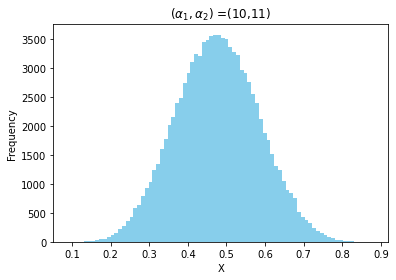

In [9]:
x = beta_rv(10, 11, 10**5)

n_bins = int(((math.ceil(max(x) * 100) / 100) - (math.floor(min(x)*100)/100))/bin_width) +1
plt.hist(x, bins = n_bins, color = "skyblue" )
plt.xlabel("X")
plt.ylabel("Frequency")
plt.title(r"$(\alpha_{1},\alpha_{2})$ =(10,11)") 
plt.show()  

**Problem 4: Dirichlet distribution**

**Using the Gamma Distribution**

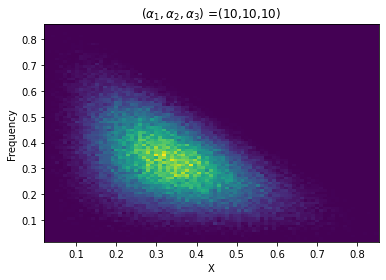

In [21]:
alpha = [10,10,10]
beta = 1 

x2_domain_dit = {}

for j in [0,1,2]:
    x2_domain_dit[j] = gam_rv(alpha[j], 1) 

matrix_x2 = [p for p in zip(x2_domain_dit[0], x2_domain_dit[1], x2_domain_dit[2])]
matrix_x2 = [[float(j)/sum(i) for j in i] for i in matrix_x2]
import numpy as np   
matrix_x2 = np.asarray(matrix_x2) 
x1= matrix_x2[:,0]
x2 = matrix_x2[:,1]
binwidth = 0.01
num_bins1 = int(((math.ceil(max(x1) * 100) / 100) - (math.floor(min(x1)*100)/100))/binwidth) +1
num_bins2 = int(((math.ceil(max(x2) * 100) / 100) - (math.floor(min(x2)*100)/100))/binwidth) +1
plt.hist2d(x1,x2, bins=[num_bins1,num_bins2])
plt.xlabel("X")
plt.ylabel("Frequency") 
plt.title(r"$(\alpha_{1},\alpha_{2},\alpha_{3})$ =(10,10,10)") 
plt.show() 

**Using the Beta Distribution**

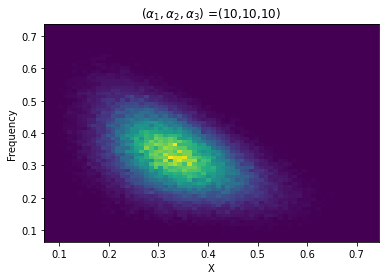

In [20]:
y_1 = beta_rv(alpha[0],alpha[1]+alpha[2], 10**5)
x_2 = beta_rv(alpha[1],alpha[2], 10**5)
y_2 = [1-y for y in y_1]
y_2 = [a * b for a, b in zip(x_2, y_2)]

x1= y_1
x2 = y_2
binwidth = 0.01
num_binsx = int(((math.ceil(max(x1) * 100) / 100) - (math.floor(min(x1)*100)/100))/binwidth) +1
num_binsy = int(((math.ceil(max(x2) * 100) / 100) - (math.floor(min(x2)*100)/100))/binwidth) +1
plt.hist2d(x1,x2, bins=[num_binsx,num_binsy])
plt.xlabel("X")
plt.ylabel("Frequency")
plt.title(r"$(\alpha_{1},\alpha_{2},\alpha_{3})$ =(10,10,10)") 
plt.show() 
